```
Copyright 2023 by LMU Munich Media Informatics Group. All rights reserved.
Created by [Changkun Ou](https://changkun.de)

Use of this source code is governed by a GPLv3 license that
can be found in the LICENSE file.
```

This notebook reproduces all the statistics visualizations in the paper of "The Impact of Expertise in the Loop for Exploring Machine Rationality".

In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'''\usepackage{libertine}\usepackage{fontawesome5}\usepackage{xcolor}'''
plt.rcParams['ps.usedistiller'] = 'xpdf'
sns.set_theme(style='ticks')

## Fig6: Behaviors

In [2]:
df_decision_time = pd.read_csv('../data/processed/decision_time_per_item.csv')
df_iterations = pd.read_csv('../data/processed/iterations.csv')
df_incomplete = pd.read_csv('../data/processed/incomplete.csv')
df_rankings = pd.read_csv('../data/processed/rankings.csv')

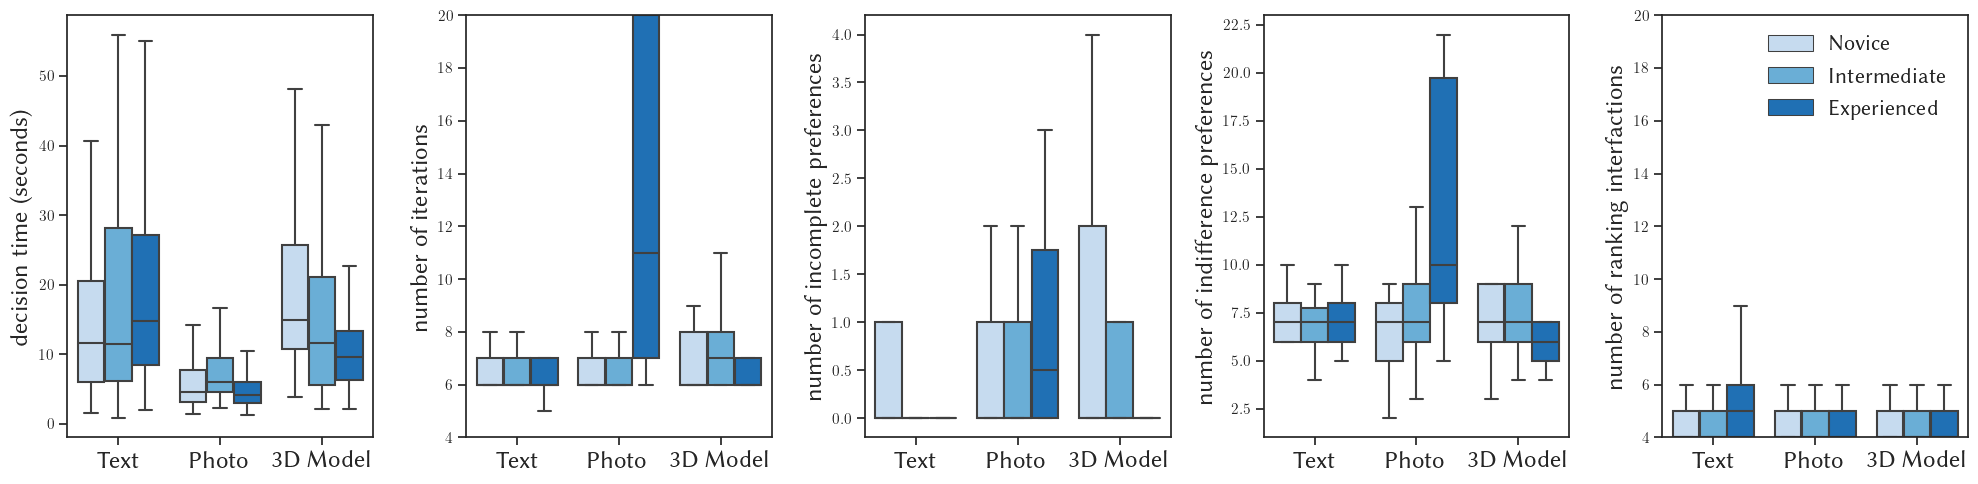

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

order = ['text', 'image', 'mesh']
labels = ['Text', 'Image', 'Mesh']
hue_order = ['N', 'I', 'E']
levels = ['Novice', 'Intermediate', 'Experienced']
domains = ['Text', 'Photo', '3D Model']
fontsize = 18
fontsize_tick = 18
colors = sns.color_palette('Blues', as_cmap=False, n_colors=3)

sns.boxplot(ax=axes[0], data=df_decision_time, x='domain', order=order, y='decision_time', hue='expertiseLevel', hue_order=hue_order, palette=colors, showfliers=False, saturation=1)
axes[0].set_xticklabels(labels, fontsize=fontsize_tick)
axes[0].set_ylabel('decision time (seconds)', fontsize=fontsize)
axes[0].set_xlabel('')
axes[0].set_xticklabels(domains)
axes[0].legend().remove()

sns.boxplot(ax=axes[1], x='domain', order=order, y='iteration', hue='expertiseLevel', hue_order=hue_order, data=df_iterations, palette=colors, showfliers=False, saturation=1)
axes[1].set_xticklabels(labels, fontsize=fontsize_tick)
axes[1].set_ylim(4, 20)
axes[1].set_ylabel('number of iterations', fontsize=fontsize)
axes[1].set_xlabel('')
axes[1].set_xticklabels(domains)
axes[1].legend().remove()

sns.boxplot(ax=axes[2], x='domain', order=order, y='incomplete', hue='expertiseLevel', hue_order=hue_order, data=df_incomplete, palette=colors, showfliers=False, saturation=1)
axes[2].set_xticklabels(domains, fontsize=fontsize_tick)
axes[2].set_ylabel('number of incomplete preferences', fontsize=fontsize)
axes[2].set_xlabel('')
axes[2].legend().remove()

sns.boxplot(ax=axes[3], x='domain', order=order, y='ties', hue='expertiseLevel', hue_order=hue_order, data=df_incomplete, palette=colors, showfliers=False, saturation=1)
axes[3].set_xticklabels(domains, fontsize=fontsize_tick)
axes[3].set_ylabel('number of indifference preferences', fontsize=fontsize)
axes[3].set_xlabel('')
axes[3].legend().remove()

sns.boxplot(ax=axes[4], data=df_rankings, x='domain', order=order, y='rankingInteraction', hue='expertiseLevel', hue_order=hue_order, palette=colors, showfliers=False, saturation=1)
axes[4].set_ylim(4, 20)
axes[4].set_xticklabels(domains, fontsize=fontsize_tick)
axes[4].set_xlabel('')
axes[4].set_ylabel('number of ranking interfactions', fontsize=fontsize)
handles, labels = axes[4].get_legend_handles_labels()
axes[4].legend(handles=handles[:], labels=levels, loc='upper right', frameon=False, fontsize=16)

plt.tight_layout()
plt.savefig('../assets/fig6_behavior.pdf', bbox_inches='tight')

## Fig7: Subjective Satisfaction

In [4]:
df_satisfaction = pd.read_csv('../data/processed/questionnaires_agreegated.csv')

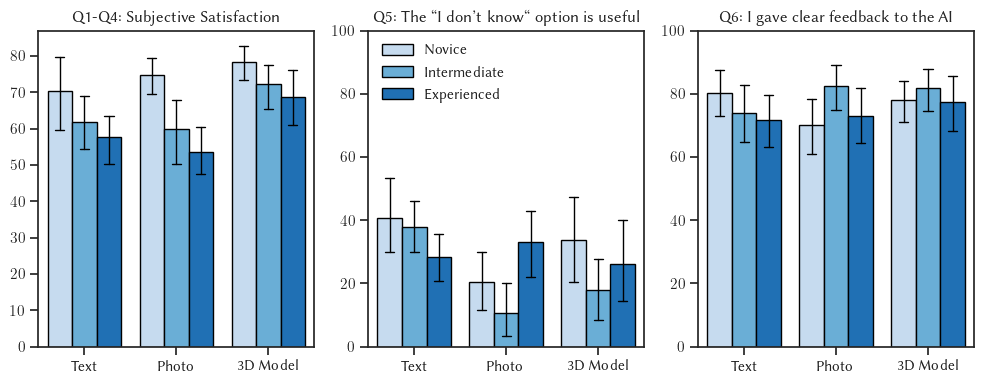

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

order = ['text', 'image', 'mesh']
hue_order = ['N', 'I', 'E']
levels = ['Novice', 'Intermediate', 'Experienced']
domains = ['Text', 'Photo', '3D Model']
fontsize = 18
fontsize_tick = 18

sns.barplot(ax=axes[0], data=df_satisfaction, x='domain', y='agg_satisfaction', hue='expertiseLevel', palette=colors, hue_order=hue_order, errwidth=1, capsize=0.1, ci=95, linewidth=1, edgecolor='black', errcolor='black', saturation=1)
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_xticklabels(domains)
axes[0].set_title('Q1-Q4: Subjective Satisfaction')
axes[0].legend().remove()

sns.barplot(ax=axes[1], data=df_satisfaction, x='domain', y='incompletePreference', hue='expertiseLevel', palette=colors, hue_order=hue_order, errwidth=1, capsize=0.1, ci=95, linewidth=1, edgecolor='black', errcolor='black', saturation=1)
axes[1].set_ylim(0, 100)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(domains)
axes[1].set_title('Q5: The ``I don\'t know`` option is useful')
axes[1].legend().remove()
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[:], labels=['Novice', 'Intermediate', 'Experienced'], loc='upper left', frameon=False)

sns.barplot(ax=axes[2], data=df_satisfaction, x='domain', y='regret', hue='expertiseLevel', palette=colors, hue_order=hue_order, errwidth=1, capsize=0.1, ci=95, linewidth=1, edgecolor='black', errcolor='black', saturation=1)
axes[2].set_ylim(0, 100)
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].set_xticklabels(domains)
axes[2].set_title('Q6: I gave clear feedback to the AI')
axes[2].legend().remove()

plt.tight_layout()
plt.savefig('../assets/fig7_satisfaction.pdf', bbox_inches='tight')

## Fig8: Directly Measured Utility

In [6]:
df_listwise_ranking_progress = pd.read_csv('../data/processed/utility_direct.csv')

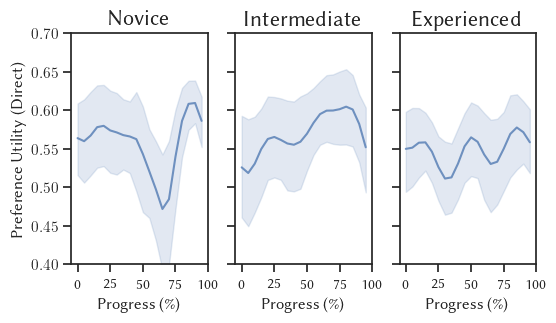

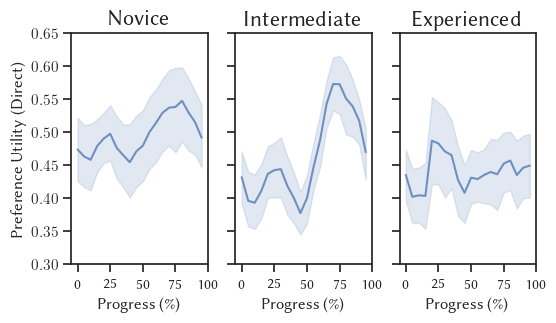

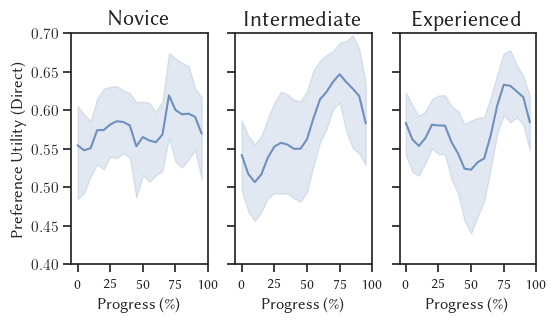

In [7]:
colors = ['#6e90bf', '#c26f6d']
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
sns.lineplot(ax=axes[0], data=df_listwise_ranking_progress[(df_listwise_ranking_progress.domain == 'text') & (df_listwise_ranking_progress.expertiseLevel == 'N')], x='iteration', y='utility', color=colors[0])
sns.lineplot(ax=axes[1], data=df_listwise_ranking_progress[(df_listwise_ranking_progress.domain == 'text') & (df_listwise_ranking_progress.expertiseLevel == 'I')], x='iteration', y='utility', color=colors[0])
sns.lineplot(ax=axes[2], data=df_listwise_ranking_progress[(df_listwise_ranking_progress.domain == 'text') & (df_listwise_ranking_progress.expertiseLevel == 'E')], x='iteration', y='utility', color=colors[0])
axes[0].set_ylim(0.4, 0.7)
axes[1].set_ylim(0.4, 0.7)
axes[2].set_ylim(0.4, 0.7)
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[2].set_xticks([0, 5, 10, 15, 20])
axes[0].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[1].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[2].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[0].set_title('Novice', fontsize=16)
axes[1].set_title('Intermediate', fontsize=16)
axes[2].set_title('Experienced', fontsize=16)
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_xlabel('Progress (\%)')
axes[1].set_xlabel('Progress (\%)')
axes[2].set_xlabel('Progress (\%)')
# axes[0].set_yticklabels([])
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[0].set_ylabel('Preference Utility (Direct)')
plt.savefig('../assets/fig8_utility_direct_text.pdf', dpi=300, bbox_inches='tight')

colors = ['#6e90bf', '#c26f6d']
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
sns.lineplot(ax=axes[0], data=df_listwise_ranking_progress[(df_listwise_ranking_progress.domain == 'image') & (df_listwise_ranking_progress.expertiseLevel == 'N')], x='iteration', y='utility', color=colors[0])
sns.lineplot(ax=axes[1], data=df_listwise_ranking_progress[(df_listwise_ranking_progress.domain == 'image') & (df_listwise_ranking_progress.expertiseLevel == 'I')], x='iteration', y='utility', color=colors[0])
sns.lineplot(ax=axes[2], data=df_listwise_ranking_progress[(df_listwise_ranking_progress.domain == 'image') & (df_listwise_ranking_progress.expertiseLevel == 'E')], x='iteration', y='utility', color=colors[0])
axes[0].set_ylim(0.3, 0.65)
axes[1].set_ylim(0.3, 0.65)
axes[2].set_ylim(0.3, 0.65)
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[2].set_xticks([0, 5, 10, 15, 20])
axes[0].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[1].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[2].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[0].set_title('Novice', fontsize=16)
axes[1].set_title('Intermediate', fontsize=16)
axes[2].set_title('Experienced', fontsize=16)
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_xlabel('Progress (\%)')
axes[1].set_xlabel('Progress (\%)')
axes[2].set_xlabel('Progress (\%)')
# axes[0].set_yticklabels([])
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[0].set_ylabel('Preference Utility (Direct)')
plt.savefig('../assets/fig8_utility_direct_image.pdf', dpi=300, bbox_inches='tight')

colors = ['#6e90bf', '#c26f6d']
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
sns.lineplot(ax=axes[0], data=df_listwise_ranking_progress[(df_listwise_ranking_progress.domain == 'mesh') & (df_listwise_ranking_progress.expertiseLevel == 'N')], x='iteration', y='utility', color=colors[0])
sns.lineplot(ax=axes[1], data=df_listwise_ranking_progress[(df_listwise_ranking_progress.domain == 'mesh') & (df_listwise_ranking_progress.expertiseLevel == 'I')], x='iteration', y='utility', color=colors[0])
sns.lineplot(ax=axes[2], data=df_listwise_ranking_progress[(df_listwise_ranking_progress.domain == 'mesh') & (df_listwise_ranking_progress.expertiseLevel == 'E')], x='iteration', y='utility', color=colors[0])
axes[0].set_ylim(0.4, 0.7)
axes[1].set_ylim(0.4, 0.7)
axes[2].set_ylim(0.4, 0.7)
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[2].set_xticks([0, 5, 10, 15, 20])
axes[0].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[1].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[2].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[0].set_title('Novice', fontsize=16)
axes[1].set_title('Intermediate', fontsize=16)
axes[2].set_title('Experienced', fontsize=16)
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_xlabel('Progress (\%)')
axes[1].set_xlabel('Progress (\%)')
axes[2].set_xlabel('Progress (\%)')
# axes[0].set_yticklabels([])
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[0].set_ylabel('Preference Utility (Direct)')

plt.savefig('../assets/fig8_utility_direct_mesh.pdf', dpi=300, bbox_inches='tight')

## Fig9: Latent Utility

In [8]:
df_listwise_ranking_latent_progress = pd.read_csv('../data/processed/utility_latent.csv')

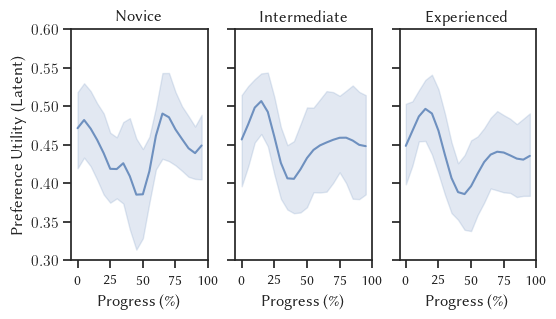

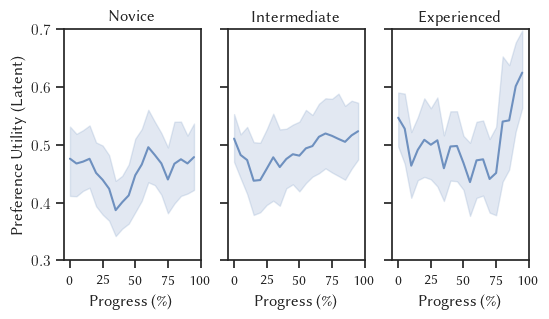

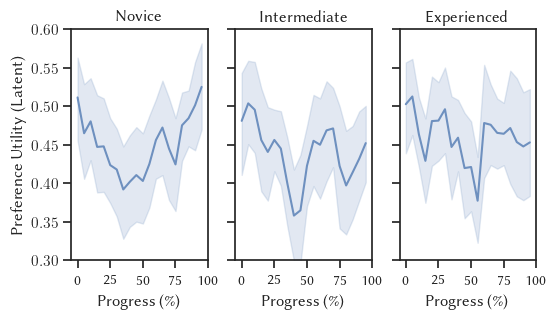

In [9]:
colors = ['#6e90bf', '#c26f6d']
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
sns.lineplot(ax=axes[0], data=df_listwise_ranking_latent_progress[(df_listwise_ranking_latent_progress.domain == 'text') & (df_listwise_ranking_latent_progress.expertiseLevel == 'N')], x='iteration', y='utility', color=colors[0])
sns.lineplot(ax=axes[1], data=df_listwise_ranking_latent_progress[(df_listwise_ranking_latent_progress.domain == 'text') & (df_listwise_ranking_latent_progress.expertiseLevel == 'I')], x='iteration', y='utility', color=colors[0])
sns.lineplot(ax=axes[2], data=df_listwise_ranking_latent_progress[(df_listwise_ranking_latent_progress.domain == 'text') & (df_listwise_ranking_latent_progress.expertiseLevel == 'E')], x='iteration', y='utility', color=colors[0])
axes[0].set_ylim(0.3, 0.6)
axes[1].set_ylim(0.3, 0.6)
axes[2].set_ylim(0.3, 0.6)
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[2].set_xticks([0, 5, 10, 15, 20])
axes[0].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[1].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[2].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[0].set_title('Novice')
axes[1].set_title('Intermediate')
axes[2].set_title('Experienced')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_xlabel('Progress (\%)')
axes[1].set_xlabel('Progress (\%)')
axes[2].set_xlabel('Progress (\%)')
# axes[0].set_yticklabels([])
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[0].set_ylabel('Preference Utility (Latent)')
plt.savefig('../assets/fig9_utility_latent_text.pdf', dpi=300, bbox_inches='tight')

colors = ['#6e90bf', '#c26f6d']
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
sns.lineplot(ax=axes[0], data=df_listwise_ranking_latent_progress[(df_listwise_ranking_latent_progress.domain == 'image') & (df_listwise_ranking_latent_progress.expertiseLevel == 'N')], x='iteration', y='utility', color=colors[0])
sns.lineplot(ax=axes[1], data=df_listwise_ranking_latent_progress[(df_listwise_ranking_latent_progress.domain == 'image') & (df_listwise_ranking_latent_progress.expertiseLevel == 'I')], x='iteration', y='utility', color=colors[0])
sns.lineplot(ax=axes[2], data=df_listwise_ranking_latent_progress[(df_listwise_ranking_latent_progress.domain == 'image') & (df_listwise_ranking_latent_progress.expertiseLevel == 'E')], x='iteration', y='utility', color=colors[0])
axes[0].set_ylim(0.3, 0.7)
axes[1].set_ylim(0.3, 0.7)
axes[2].set_ylim(0.3, 0.7)
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[2].set_xticks([0, 5, 10, 15, 20])
axes[0].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[1].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[2].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[0].set_title('Novice')
axes[1].set_title('Intermediate')
axes[2].set_title('Experienced')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_xlabel('Progress (\%)')
axes[1].set_xlabel('Progress (\%)')
axes[2].set_xlabel('Progress (\%)')
# axes[0].set_yticklabels([])
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[0].set_ylabel('Preference Utility (Latent)')
plt.savefig('../assets/fig9_utility_latent_image.pdf', dpi=300, bbox_inches='tight')

colors = ['#6e90bf', '#c26f6d']
fig, axes = plt.subplots(1, 3, figsize=(6, 3))
sns.lineplot(ax=axes[0], data=df_listwise_ranking_latent_progress[(df_listwise_ranking_latent_progress.domain == 'mesh') & (df_listwise_ranking_latent_progress.expertiseLevel == 'N')], x='iteration', y='utility', color=colors[0])
sns.lineplot(ax=axes[1], data=df_listwise_ranking_latent_progress[(df_listwise_ranking_latent_progress.domain == 'mesh') & (df_listwise_ranking_latent_progress.expertiseLevel == 'I')], x='iteration', y='utility', color=colors[0])
sns.lineplot(ax=axes[2], data=df_listwise_ranking_latent_progress[(df_listwise_ranking_latent_progress.domain == 'mesh') & (df_listwise_ranking_latent_progress.expertiseLevel == 'E')], x='iteration', y='utility', color=colors[0])
axes[0].set_ylim(0.3, 0.6)
axes[1].set_ylim(0.3, 0.6)
axes[2].set_ylim(0.3, 0.6)
axes[0].set_xticks([0, 5, 10, 15, 20])
axes[1].set_xticks([0, 5, 10, 15, 20])
axes[2].set_xticks([0, 5, 10, 15, 20])
axes[0].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[1].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[2].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
axes[0].set_title('Novice')
axes[1].set_title('Intermediate')
axes[2].set_title('Experienced')
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[0].set_xlabel('Progress (\%)')
axes[1].set_xlabel('Progress (\%)')
axes[2].set_xlabel('Progress (\%)')
# axes[0].set_yticklabels([])
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[0].set_ylabel('Preference Utility (Latent)')

plt.savefig('../assets/fig9_utility_latent_mesh.pdf', dpi=300, bbox_inches='tight')

## Fig10: Objective Quality of System Outcomes

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

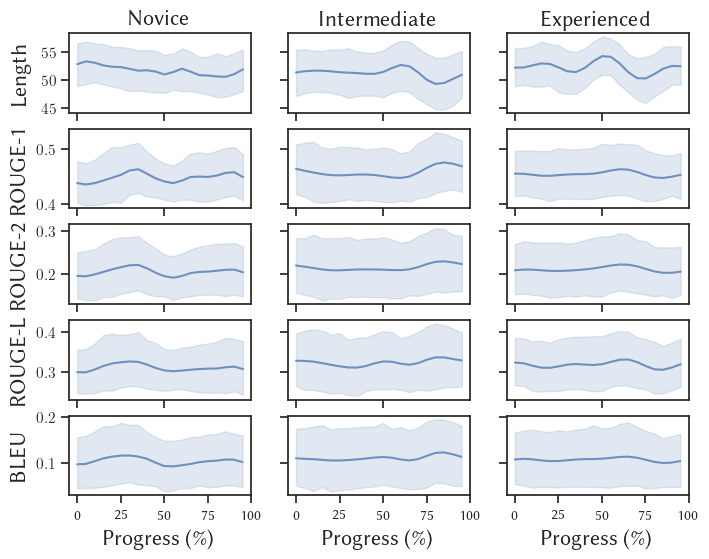

In [10]:
df_quality_progress = pd.read_csv('../data/processed/quality_text_progress.csv')

fig, axes = plt.subplots(5, 3, figsize=(8, 6))
colors = ['#6e90bf', '#c26f6d']
metrics = ['length', 'rouge1', 'rouge2', 'rougeL', 'BLEU']
expertises = ['N', 'I', 'E']
for j in range(5):
    for i in range(3):
        sns.lineplot(ax=axes[j][i], data=df_quality_progress[df_quality_progress.expertiseLevel == expertises[i]], x='iteration', y=metrics[j], color=colors[0])

ymin, ymax = axes[0][0].get_ylim()
for j in range(3):
    yi, ya = axes[i][j].get_ylim()
    if ya > ymax:
        ymax = ya
    if yi < ymin:
        ymin = yi


for i in range(5):
    ymin, ymax = axes[i][0].get_ylim()
    for j in range(3):
        yi, ya = axes[i][j].get_ylim()
        if ya > ymax:
            ymax = ya
        if yi < ymin:
            ymin = yi

    for j in range(3):
        axes[i][j].set_ylim(ymin, ymax)
        axes[i][j].set_title('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylabel('')
        if i < 4:
            axes[i][j].set_xticklabels([])
        if j > 0:
            axes[i][j].set_yticklabels([])
        axes[i][j].legend().remove()

expertiseLevels = ['Novice', 'Intermediate', 'Experienced']
for i in range(3):
    axes[0][i].set_title(expertiseLevels[i], fontsize=16)
metrics = ['Length', 'ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'BLEU']
for i in range(5):
    axes[i][0].set_ylabel(metrics[i], fontsize=16)

for i in range(3):
    axes[4][i].set_xticks([0, 5, 10, 15, 20])
    axes[4][i].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
    axes[4][i].set_xlabel('Progress (\%)', fontsize=16)

fig.align_ylabels(axes[:, 0])

plt.savefig('../assets/fig10_quality_text.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

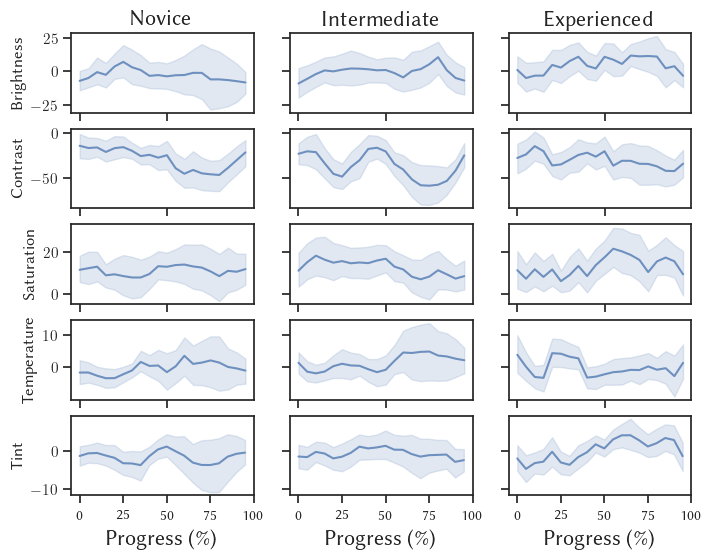

In [11]:
df_quality_progress = pd.read_csv('../data/processed/quality_image_progress.csv')

fig, axes = plt.subplots(5, 3, figsize=(8, 6))
colors = ['#6e90bf', '#c26f6d']
metrics = ['brightness','contrast','saturation','temperature','tint']
expertises = ['N', 'I', 'E']
for j in range(5):
    for i in range(3):
        sns.lineplot(ax=axes[j][i], data=df_quality_progress[df_quality_progress.expertiseLevel == expertises[i]], x='iteration', y=metrics[j], color=colors[0])

ymin, ymax = axes[0][0].get_ylim()
for j in range(3):
    yi, ya = axes[i][j].get_ylim()
    if ya > ymax:
        ymax = ya
    if yi < ymin:
        ymin = yi


for i in range(5):
    ymin, ymax = axes[i][0].get_ylim()
    for j in range(3):
        yi, ya = axes[i][j].get_ylim()
        if ya > ymax:
            ymax = ya
        if yi < ymin:
            ymin = yi

    for j in range(3):
        axes[i][j].set_ylim(ymin, ymax)
        axes[i][j].set_title('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylabel('')
        axes[i][j].set_xticklabels([])
        if j > 0:
            axes[i][j].set_yticklabels([])
        axes[i][j].legend().remove()

expertiseLevels = ['Novice', 'Intermediate', 'Experienced']
for i in range(3):
    axes[0][i].set_title(expertiseLevels[i], fontsize=16)
metrics = ['Brightness', 'Contrast', 'Saturation', 'Temperature', 'Tint']
for i in range(5):
    axes[i][0].set_ylabel(metrics[i], fontsize=12)

for i in range(3):
    axes[4][i].set_xticks([0, 5, 10, 15, 20])
    axes[4][i].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
    axes[4][i].set_xlabel('Progress (\%)', fontsize=16)

plt.savefig('../assets/fig10_quality_image.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

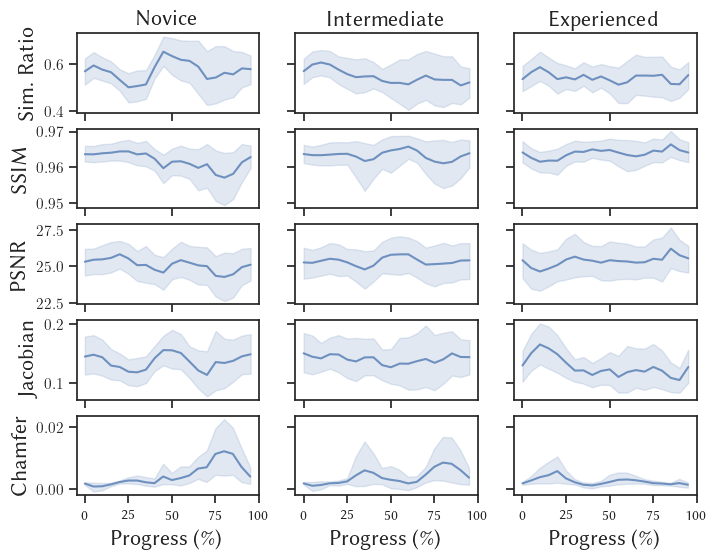

In [12]:
df_quality_progress = pd.read_csv('../data/processed/quality_mesh_progress.csv')

fig, axes = plt.subplots(5, 3, figsize=(8, 6))
colors = ['#6e90bf', '#c26f6d']
metrics = ['reduction_ratio', 'ssim', 'psnr', 'cell', 'surf']
expertises = ['N', 'I', 'E']
for j in range(5):
    for i in range(3):
        sns.lineplot(ax=axes[j][i], data=df_quality_progress[df_quality_progress.expertiseLevel == expertises[i]], x='iteration', y=metrics[j], color=colors[0])

ymin, ymax = axes[0][0].get_ylim()
for j in range(3):
    yi, ya = axes[i][j].get_ylim()
    if ya > ymax:
        ymax = ya
    if yi < ymin:
        ymin = yi


for i in range(5):
    ymin, ymax = axes[i][0].get_ylim()
    for j in range(3):
        yi, ya = axes[i][j].get_ylim()
        if ya > ymax:
            ymax = ya
        if yi < ymin:
            ymin = yi

    for j in range(3):
        axes[i][j].set_ylim(ymin, ymax)
        axes[i][j].set_title('')
        axes[i][j].set_xlabel('')
        axes[i][j].set_ylabel('')
        axes[i][j].set_xticklabels([])
        if j > 0:
            axes[i][j].set_yticklabels([])
        axes[i][j].legend().remove()

expertiseLevels = ['Novice', 'Intermediate', 'Experienced']
for i in range(3):
    axes[0][i].set_title(expertiseLevels[i], fontsize=16)
metrics = ['Sim. Ratio', 'SSIM', 'PSNR', 'Jacobian', 'Chamfer']
for i in range(5):
    axes[i][0].set_ylabel(metrics[i], fontsize=16)

for i in range(3):
    axes[4][i].set_xticks([0, 5, 10, 15, 20])
    axes[4][i].set_xticklabels([0, int(500/20), int(1000/20), int(1500/20), 100])
    axes[4][i].set_xlabel('Progress (\%)', fontsize=16)

plt.savefig('../assets/fig10_quality_mesh.pdf', bbox_inches='tight')